## 1.Importing Data and Understanding it.

The datset can be found here.
<nav>
<a href="https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01&select=kc_house_data.csv"> House Sales in King County, USA </a>


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [2]:
# Reading the data file.
df=pd.read_csv('kc_NaN.csv')

In [3]:
# To display all the columns. 
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# No. of rows and columns. 
df.shape

(21613, 22)

In [7]:
# To see column labels. 
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

<div class="alert alert-block alert-info">
<b> From above, it can be seen that "bedrooms" and "bathrooms" have some missing rows.         
    We shall tackle them in Data cleaning part.</div>

---
---

## 2.Data Cleaning. 

In [10]:
# To see missing values. 
df.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [11]:
# Replacing missing values with the mean value. 
mean_bed=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean_bed, inplace=True)

In [12]:
# Replacing missing values with the mean value. 
mean_bath=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, mean_bath, inplace=True)

In [13]:
# Checking missing values again. 
df.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
# To see data types of all the columns. 
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [15]:
# Dropping 'Unnamed' column. 
df.drop(columns={'Unnamed: 0', 'id'}, axis=1, inplace=True)

---
---

## 3.Exploratory Analysis.

In [16]:
# Statistical summary. 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


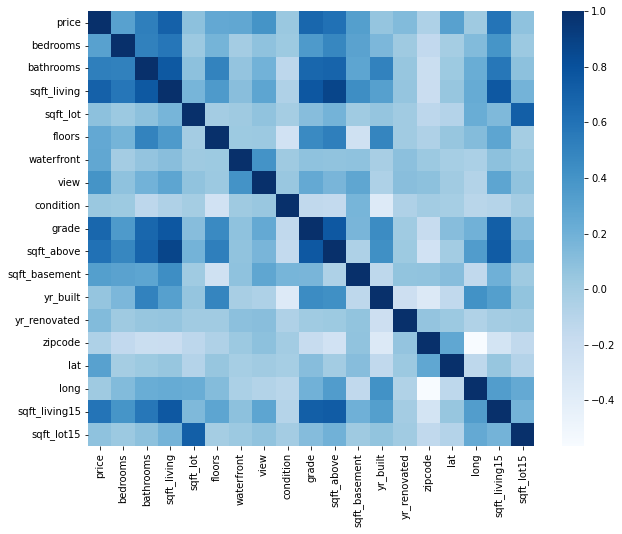

In [26]:
# To see if their is correlation between price and other features. 
corrMatrix = df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corrMatrix, cmap="Blues")
plt.show()

In [29]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

<div class="alert alert-block alert-info">
<b>Inference:</b> There is large correlation between price and "sqft_living", "sqft_above", "grade", "sqft_living15". And weak correlation between price and "bathrooms", "bedrooms".  </div>

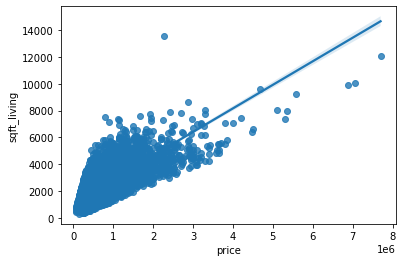

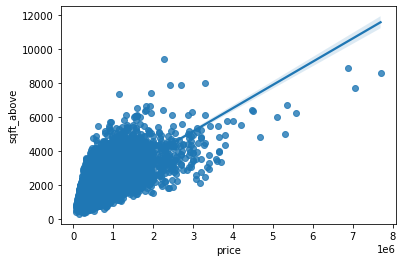

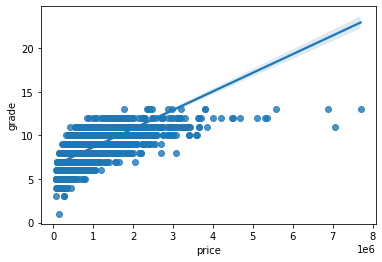

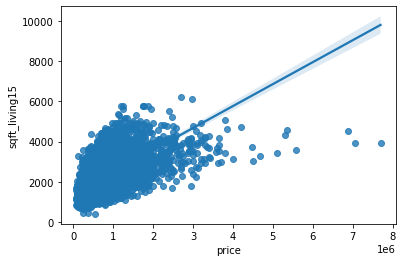

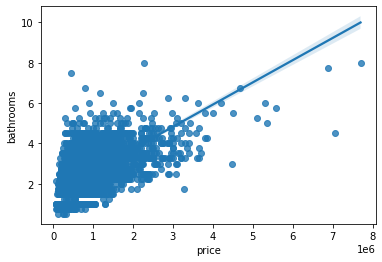

In [28]:
# Let's see it through regression plots. 
Columns= ["sqft_living", "sqft_above", "grade", "sqft_living15", "bathrooms"]
for feature in Columns:
    sns.regplot(x=df["price"], y=df[feature])
    plt.show()

In [30]:
# How many houses have one floor. 
floor_df=df['floors'].value_counts().to_frame()
floor_df

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [31]:
# How many houses have waterfront?
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

<AxesSubplot:xlabel='waterfront', ylabel='price'>

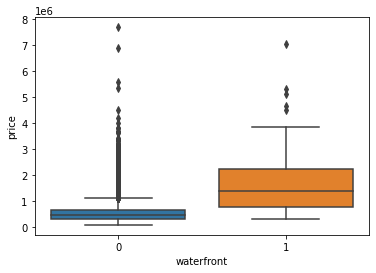

In [32]:
# Waterfront houses should be expensive. 
sns.boxplot(x='waterfront', y='price', data=df)

---
---

## 4.Model Development and Evaluation.

- ***Linear Regression***

In [33]:
lm=LinearRegression()
X=df[['sqft_living']]
Y=df[['price']]
lm.fit(X,Y)

LinearRegression()

In [34]:
Yhat=lm.predict(X)
Yhat[0:1] 

array([[287555.06702452]])

In [35]:
lm.intercept_

array([-43580.74309447])

In [36]:
lm.coef_

array([[280.6235679]])

### The linear model comes out to be 
### price=-43580.74309447+ 280.6235679*sqft_living

In [37]:
# Evaluation
r_squared = lm.score(X, Y)
print (r_squared)

0.4928532179037931


<div class="alert alert-block alert-info">
<b>This means 49.28 % of the variation in price can be explained by sqft_living. </div>

- ***Multiple Linear Regression***

In [38]:
Z=df[["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15",
      "sqft_above", "grade", "sqft_living"]]
A=df[['price']]
lm.fit(Z, A)
print (lm.intercept_)
print (lm.coef_)

[-32382535.85823347]
[[-2.98936449e+04  6.01930234e+05  6.72855361e+05 -2.59783985e+04
  -4.73564581e+14  6.70908533e+04 -3.26565588e+03  4.54356111e+00
  -4.73564581e+14  8.20151586e+04  4.73564581e+14]]


### The multiple linear regression model comes out to be as follows:
### price= -32382535.85823347 - 2.98936449e+04 * (floors) + 6.01930234e+05 * (waterfront) + 6.72855361e+05 * (lat) - 2.59783985e+04 * (bedrooms) - 4.73564581e+14 * (sqft_basement) + 6.70908533e+04 * (view) - 3.26565588e+03 * (bathrooms) + 4.54356111e+00 * (sqft_living15) - 4.73564581e+14 * (sqft_above) + 8.20151586e+04 * (grade) + 4.73564581e+14 * (sqft_living)

In [39]:
Yhat=lm.predict(Z)
Yhat[0:1] 

array([[283777.14176653]])

In [40]:
lm.score(Z,A)

0.6576885711683069

<div class="alert alert-block alert-info">
<b>This means our model fits 65.76 % and it is a better fit than above linear regression model. </div> 

- ***Polynomial Regression and pipeline***

In [41]:
Input=[ ('scale',StandardScaler() ), ('polynomial', PolynomialFeatures(include_bias=False)), 
       ('model', LinearRegression())
]

In [42]:
pipe=Pipeline(Input)

In [43]:
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [44]:
pipe.fit(Z,A)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [45]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([[349612.125],
       [559160.125],
       [449828.125],
       [393276.125]])

In [46]:
pipe.score(Z, A)

0.7513387707402615

<div class="alert alert-block alert-info">
<b> R squared is 75.13 % and is better than multiple linear regression model above. </div> 

- ***Ridge Regression***

In [48]:
#Splitting into train and test data.
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,
           "bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [49]:
RigeModel=Ridge(alpha=0.1)

In [50]:
RigeModel.fit(x_train, y_train)

Ridge(alpha=0.1)

In [51]:
yhat = RigeModel.predict(x_test)

In [52]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [651781.17964158 514958.12791319 794388.65874944 702639.20038572]
test set : [ 459000.  445000. 1057000.  732350.]


In [53]:
test_score, train_score = RigeModel.score(x_test, y_test), RigeModel.score(x_train, y_train)

In [54]:
test_score, train_score 

(0.6478759163939118, 0.6594378534950245)

In [55]:
# Let's see it for different values of alpha.
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train, y_train)
    test_score, train_score = RigeModel.score(x_test, y_test), RigeModel.score(x_train, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/AHMAD/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.2922e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
100%|██████████| 1000/1000 [00:16<00:00, 61.70it/s, Test Score=0.563, Train Score=0.567]


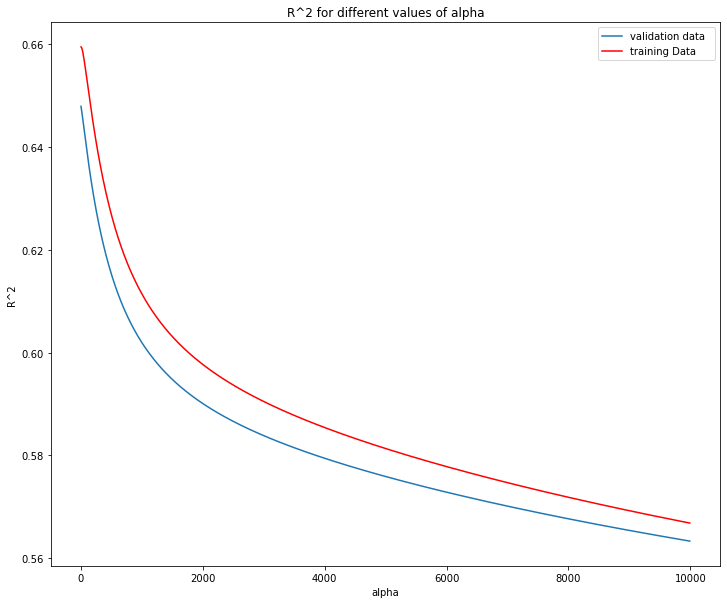

In [58]:
# Let's see it through plotting
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.title('R^2 for different values of alpha')
plt.ylabel('R^2')
plt.legend()

In [59]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,
                                     "bathrooms","sqft_living15","sqft_above","grade","sqft_living"]])
x_test_pr=pr.fit_transform(x_test[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,
                                   "bathrooms","sqft_living15","sqft_above","grade","sqft_living"]])

In [60]:
RigeModel=Ridge(alpha=0.1)

In [61]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [62]:
RigeModel.fit(x_test_pr, y_test)

Ridge(alpha=0.1)

In [63]:
RigeModel.score(x_test_pr, y_test)

0.7666545737095763

<div class="alert alert-block alert-info">
<b> R squared is 76.66 % and is better than polynomial regression model above. </div> 